In [2]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

In [3]:

import datetime
from functools import partial

from octo.model.octo_model import OctoModel

model = OctoModel.load_pretrained("hf://rail-berkeley/octo-small-1.5")

2024-12-02 12:40:19.174980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 12:40:19.175003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 12:40:19.175925: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 12:40:19.591143: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/kevin/miniconda3/envs/octo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook imp

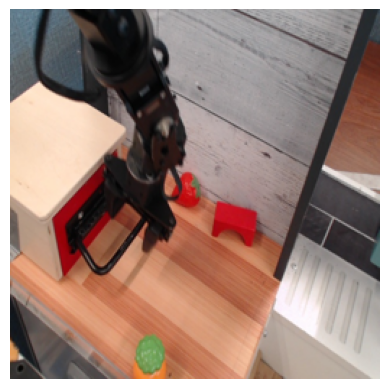

Image loaded


In [4]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

# download one example BridgeV2 image
IMAGE_URL = "https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg"
img = np.array(Image.open(requests.get(IMAGE_URL, stream=True).raw).resize((256, 256)))
plt.imshow(img)
plt.axis("off")  # Optional
plt.show()

print("Image loaded")

In [ ]:
# create obs & task dict, run inference
import jax
# add batch + time horizon 1
img = img[np.newaxis,np.newaxis,...]
observation = {"image_primary": img, "timestep_pad_mask": np.array([[True]])}
task = model.create_tasks(texts=["pick up the fork"])
action = model.sample_actions(
    observation, 
    task, 
    unnormalization_statistics=model.dataset_statistics["bridge_dataset"]["action"], 
    rng=jax.random.PRNGKey(0)
)
print(action)   # [batch, action_chunk, action_dim]